# Assignment 10

In [32]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [33]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [34]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 1.01450909],
       [ 1.28637273],
       [ 1.26297607],
       ...,
       [ 0.9515889 ],
       [-0.29804831],
       [ 1.06013354]])

In [71]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[1.76450909],
       [2.03637273],
       [2.01297607],
       ...,
       [1.7015889 ],
       [0.45195169],
       [1.81013354]])

In [72]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.34922143],
       [1.45982355],
       [1.45299626],
       ...,
       [1.31433871],
       [0.20634488],
       [1.37242076]])

### Code below contains the parts to be edited

Imitation of formula 'x+0.75'
Weight_1:4.68666657444842
Weight_2:3.638463982244471
Bias:0.0


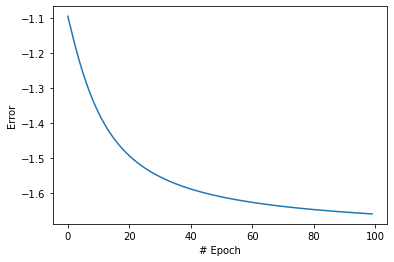

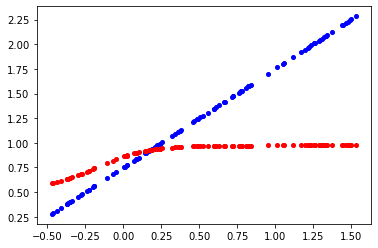


Imitation of formula 'sin(x)+0.5'
Weight_1:4.5427144768947185
Weight_2:2.5473137294309507
Bias:0.0


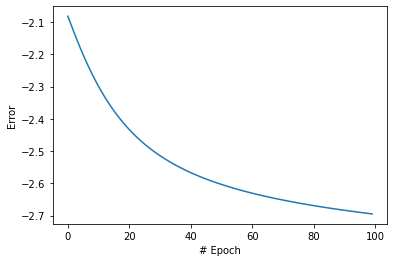

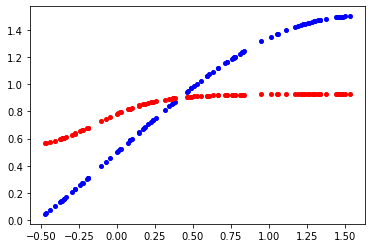

In [82]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0 # set me!
        self.y          = 0 # set me!        
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # (a) Feed-forward pass
    def feed_forward(self):
        
        # TODO: Feed-forward pass and error estimation, store results in state information members
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2
        self.a1 = self.weight_1*self.X + self.bias
        self.hidden = 1.0/(1.0 + np.exp(-self.a1))
        self.a2 = self.weight_2*self.hidden
        self.output = 1.0/(1.0 + np.exp(-self.a2))
        self.error = 0.5*((self.y-self.output)**2)
        
    # (b) Back-propagation pass
    def back_prop(self):
        
        # TODO: Derivations of parameters
        # TODO: Update the parameters with learning rate of 0.01
        #self.feed_forward()
        derror = self.output-self.y
        doutput = self.output * (1 - self.output)
        dweight_1 = self.X
        dweight_2 = self.hidden
        derror_w1 = derror * doutput * dweight_1
        derror_w2 = derror * doutput * dweight_2
        

        self.weight_1 =self.weight_1 - 0.01*derror_w1
        self.weight_2 =self.weight_2 - 0.01*derror_w2
        self.bias = 0.01*self.bias
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []
    
    
    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):
        #nn.set_sample(X[i],y[i]) # sets sample with 2 as input and 5 as target
        epoch_err=[]
        for i in range(0, X.shape[0]):
            nn.set_sample(X[i],y[i]) 
            nn.feed_forward() # perform feed-forward to calculate output
            nn.back_prop() # use difference between target and actual output to update parameters
            #Remember final error of each epoch in "epoch_error"
            epoch_err.append(nn.error) 
        epoch_error.append(np.mean(epoch_err)) 
                               
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)